In [1]:
import pathpyG as pp
import torch
from pathpyG.visualisations.network_plots import network_plot
print('Running on', pp.config['torch']['device'])

Running on cpu


Plotting a simple Graph

In [2]:
g = pp.Graph.from_edge_list([['a', 'b'], ['c','b']])
print(g)

Graph with 3 nodes and 2 edges

Node attributes
	node_id		<class 'list'>

Graph attributes
	num_nodes		<class 'int'>



With plot function a simple interactive plot will be shown.

In [3]:
pp.plot(g)

A matplotlib image can be created with the coresponding backend option. per default the layout is choosen to be random (due to computational resons), with the option layout=fr a Fruchterman-Reingold can be selected.

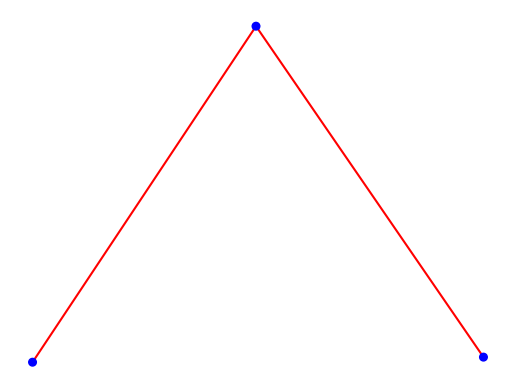

In [4]:
pp.plot(g,backend='matplotlib',layout='fr')

simple style

In [5]:
style = {}
style['node_color'] = 'red'
style['edge_color'] = 'green'
pp.plot(g,**style)

idividual changes

In [6]:
style = {}
style['node_color'] = ['red', 'green','blue']
style['node_size'] = {"a":40,"b":10, "c":25}
style['node_opacity'] = {"a":1,"b":.5,"c":.3}
style['edge_color'] = ['orange','yellow']
pp.plot(g,**style)

In [7]:
save to file

'file' was not found in history, as a file, url, nor in the user namespace.


In [8]:
pp.plot(g,filename='test_plot.html')

other option to save

In [9]:
pp.plot(g).save(filename='test_plot.html')

Larger Network

In [10]:
n = pp.io.read_netzschleuder_network('karate', '77')

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [2], [1], [1], [1], [1], [2], [2], [1], [1], [2], [1], [2], [1], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2]]
[[array([7.29272366, 3.27256202])], [array([7.32786294, 3.17925634])], [array([7.40667175, 3.09169372])], [array([7.38702617, 3.28607299])], [array([7.32992727, 3.4514882 ])], [array([7.30586348, 3.55774642])], [array([7.41649764, 3.51547165])], [array([7.47935355, 3.27277244])], [array([7.41858901, 3.01641687])], [array([7.60724428, 3.06895482])], [array([7.20114867, 3.49457553])], [array([7.05805362, 3.3740688 ])], [array([7.23519558, 3.37830384])], [array([7.45728774, 3.1613381 ])], [array([7.66327375, 2.9336657 ])], [array([7.6013153 , 2.73264807])], [array([7.40556846, 3.68423954])], [array([7.13961988, 3.16393103])], [a

In [11]:
pp.plot(n)

/Users/juergen/dev/pathpyG/.venv/lib/python3.11/site-packages/torch_geometric/data/storage.py:327: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'citation', 'node_id', 'edge_index', 'url', 'node_name', 'tags', 'node_groups', 'name', 'description', 'node__pos'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


Styling

In [12]:
color_map = {1.: 'orange', 2.: 'blue'}
node_color = [color_map[n['node_groups',v][0]] for v in n.nodes]

In [13]:
pp.plot(n, edge_color='gray',node_color=node_color)

Temporal Graph Vizualization

In [14]:
t = pp.TemporalGraph.from_edge_list(
        [
            ("a", "b", 1),
            ("b", "c", 5),
            ("c", "d", 9),
            ("d", "a", 9),
            ("a", "b", 10),
            ("b", "c", 10),
        ]
    )
t.data["edge_weight"] = torch.tensor([[.3], [.4], [.5], [1.], [.2], [.3]])

In [16]:
color = {"a": "blue", "b": "red", "c": "green", "d": "yellow"}
pp.plot(t,node_color=color,start=-1,end=25,delta=1000)